In [1]:
# Importing Libraries
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
df = pd.read_csv('ex1data1.csv')

X = torch.tensor(df['W'].values).reshape(df['W'].shape[0], 1).T
X = torch.cat((X, torch.pow(X, 2)))
X = X.T
y = torch.tensor(df['Y'].values).reshape(df['Y'].shape[0], 1)

X = X.float()
y = y.float()

In [3]:
class PolynomialRegressionModel(torch.nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = torch.nn.Linear(n_features, 1)
    
    def forward(self, x):
        return self.linear(x)
  
    def train(self, X, y, EPOCHS, learning_rate, verbose):
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(self.parameters(), lr = learning_rate)

        for epoch in range(EPOCHS):
            # Forward Pass
            y_pred = self(X)
            loss = criterion(y_pred, y)

            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if epoch % (EPOCHS // verbose) == 0: 
                print(f"Epoch : {epoch} | loss : {loss}")

        print(f"Epoch : {EPOCHS} | loss : {loss}")
        

In [4]:
def plot_curve(X, y, model):
    y_pred = []

    curve_start, _ = torch.min(X.T[0], 0)
    curve_end, _ = torch.max(X.T[0], 0) 

    curve_start = int(curve_start.item()) - 2
    curve_end = int(curve_end.item()) + 2

    for x in range(curve_start, curve_end):
        x = torch.Tensor([[x, x * x]])
        y_pred.append(model(x))

    plt.title("Labels vs Features")
    plt.xlabel("Features")
    plt.ylabel("Labels / Predictions")
    plt.scatter(X.T[0].T, y)
    plt.plot(range(curve_start, curve_end), y_pred, 'k')
    plt.show()


Epoch : 0 | loss : 7911.134765625
Epoch : 10000 | loss : 9.265226364135742
Epoch : 20000 | loss : 9.201217651367188
Epoch : 30000 | loss : 9.16628646850586
Epoch : 40000 | loss : 9.14720630645752
Epoch : 50000 | loss : 9.136749267578125
Epoch : 60000 | loss : 9.130992889404297
Epoch : 70000 | loss : 9.127754211425781
Epoch : 80000 | loss : 9.125968933105469
Epoch : 90000 | loss : 9.124911308288574
Epoch : 100000 | loss : 9.124238014221191


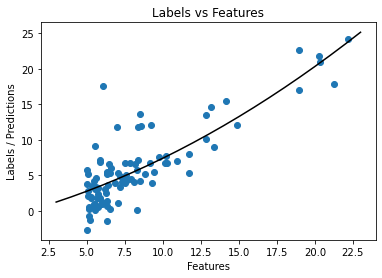

In [7]:
# Model Instance
polynomial_regression_model = PolynomialRegressionModel(2)
polynomial_regression_model.train(X, y, EPOCHS = 100000, learning_rate = 0.000001, verbose = 10)


# Plotting to see the curve
plot_curve(X, y, polynomial_regression_model)

In [8]:
# Note : Training Time can be significantly reduced by normalizing the features.